# Preparation
Import the modules:

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras as kr
import warnings

warnings.filterwarnings('ignore')

Initial parameters and impl of basic functions:

In [2]:
LABELS = [
    'T-shirt/top'
    , 'Trouser'
    , 'Pullover'
    , 'Dress'
    , 'Coat'
    , 'Sandal'
    , 'Shirt'
    , 'Sneaker'
    , 'Bag'
    , 'Ankle boot'
]

NUMBER_CLASSES = len(LABELS)


def get_layers(filters):
    return kr.layers.Conv2D(filters, (3, 3), activation='relu', padding='same')


TRANSFORMATION_SEQ = [get_layers(16),
                      get_layers(32),
                      kr.layers.MaxPooling2D((2, 2))]


def normalize(ds):
    return (ds / 255).reshape(ds.shape[0], 28, 28, 1)


def try_model(ds, best, transformation_sequences):
    model = kr.Sequential()
    for transformation in transformation_sequences:
        model.add(transformation)
    model.add(kr.layers.Flatten())
    model.add(kr.layers.Dense(NUMBER_CLASSES, activation='softmax'))
    # https://neptune.ai/blog/keras-loss-functions
    # https://habr.com/ru/post/318970/
    # https://www.tensorflow.org/api_docs/python/tf/keras/losses
    # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(ds[0], ds[1], epochs=15, verbose=1)
    # https://www.tensorflow.org/guide/keras/train_and_evaluate?hl=ru
    results = model.evaluate(ds[2], ds[3], verbose=2)
    if results[1] > best[0]: best[1] = model
    print('Test loss, Test acc:', results)
    return best

Read the input data:

In [3]:
start_time = time.time()
# https://keras.io/api/datasets/fashion_mnist/#load_data-function
dataset = kr.datasets.fashion_mnist
# train - Fashion-MNIST (https://github.com/zalandoresearch/fashion-mnist), test - MNIST (http://yann.lecun.com/exdb/mnist/)
(x_train, y_train), (x_test, y_test) = dataset.load_data()

# Normalization

In [4]:
x_train = normalize(x_train)
x_test = normalize(x_test)

# Analysis for decision tree
Find the best combination of hyperparameters (combination of convolution and pooling):

In [5]:
best = [0, None]
ds = x_train, y_train, x_test, y_test
best = try_model(ds, best, [TRANSFORMATION_SEQ[0], TRANSFORMATION_SEQ[2]])

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6254 - accuracy: 0.7838
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3519 - accuracy: 0.8763
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3186 - accuracy: 0.8887
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2916 - accuracy: 0.8977
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9049
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2511 - accuracy: 0.9105
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2351 - accuracy: 0.9155
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2287 - accuracy: 0.9180
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2169 - accuracy: 0.9229
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.211

In [6]:
best = try_model(ds, best, [TRANSFORMATION_SEQ[0], TRANSFORMATION_SEQ[2], TRANSFORMATION_SEQ[1]])

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4746 - accuracy: 0.8374
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2544 - accuracy: 0.9092
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2105 - accuracy: 0.9241
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1776 - accuracy: 0.9369
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1597 - accuracy: 0.9436
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1395 - accuracy: 0.9499
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1243 - accuracy: 0.9556
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1090 - accuracy: 0.9618
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1003 - accuracy: 0.9639
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.092

In [7]:
best = try_model(ds, best, [TRANSFORMATION_SEQ[0], TRANSFORMATION_SEQ[1], TRANSFORMATION_SEQ[2]])

Epoch 1/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4078 - accuracy: 0.8571
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2015 - accuracy: 0.9265
Epoch 3/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1622 - accuracy: 0.9409
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1338 - accuracy: 0.9524
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1155 - accuracy: 0.9584
Epoch 6/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0938 - accuracy: 0.9670
Epoch 7/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0857 - accuracy: 0.9696
Epoch 8/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0770 - accuracy: 0.9737
Epoch 9/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0662 - accuracy: 0.9772
Epoch 10/15
1875/1875 [==============================] - 13s 7ms/step - l

In [8]:
best = try_model(ds, best, [TRANSFORMATION_SEQ[0], TRANSFORMATION_SEQ[2], TRANSFORMATION_SEQ[1], TRANSFORMATION_SEQ[2]])

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3852 - accuracy: 0.8664
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1607 - accuracy: 0.9423
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1254 - accuracy: 0.9559
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0982 - accuracy: 0.9656
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0800 - accuracy: 0.9726
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0687 - accuracy: 0.9759
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0557 - accuracy: 0.9810
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9823
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0457 - accuracy: 0.9843
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.038

Let us construct an ordinary imprecision matrix:

In [9]:
predicted = best[1].predict(x_test)
confusion_matrix = np.zeros((NUMBER_CLASSES, NUMBER_CLASSES))
similarities_matrix = np.full((NUMBER_CLASSES, NUMBER_CLASSES, 2), [-1, 0.0])
for i in range(len(predicted)):
    label = np.argmax(predicted[i])
    val_pred = predicted[i][label]
    if val_pred > similarities_matrix[y_test[i]][label][1]:
        similarities_matrix[y_test[i]][label] = (i, predicted[i][label])
    confusion_matrix[y_test[i]][label] += 1

Let us construct a matrix in which cell i,j contains an image of class i, which the network considered most similar to class j:

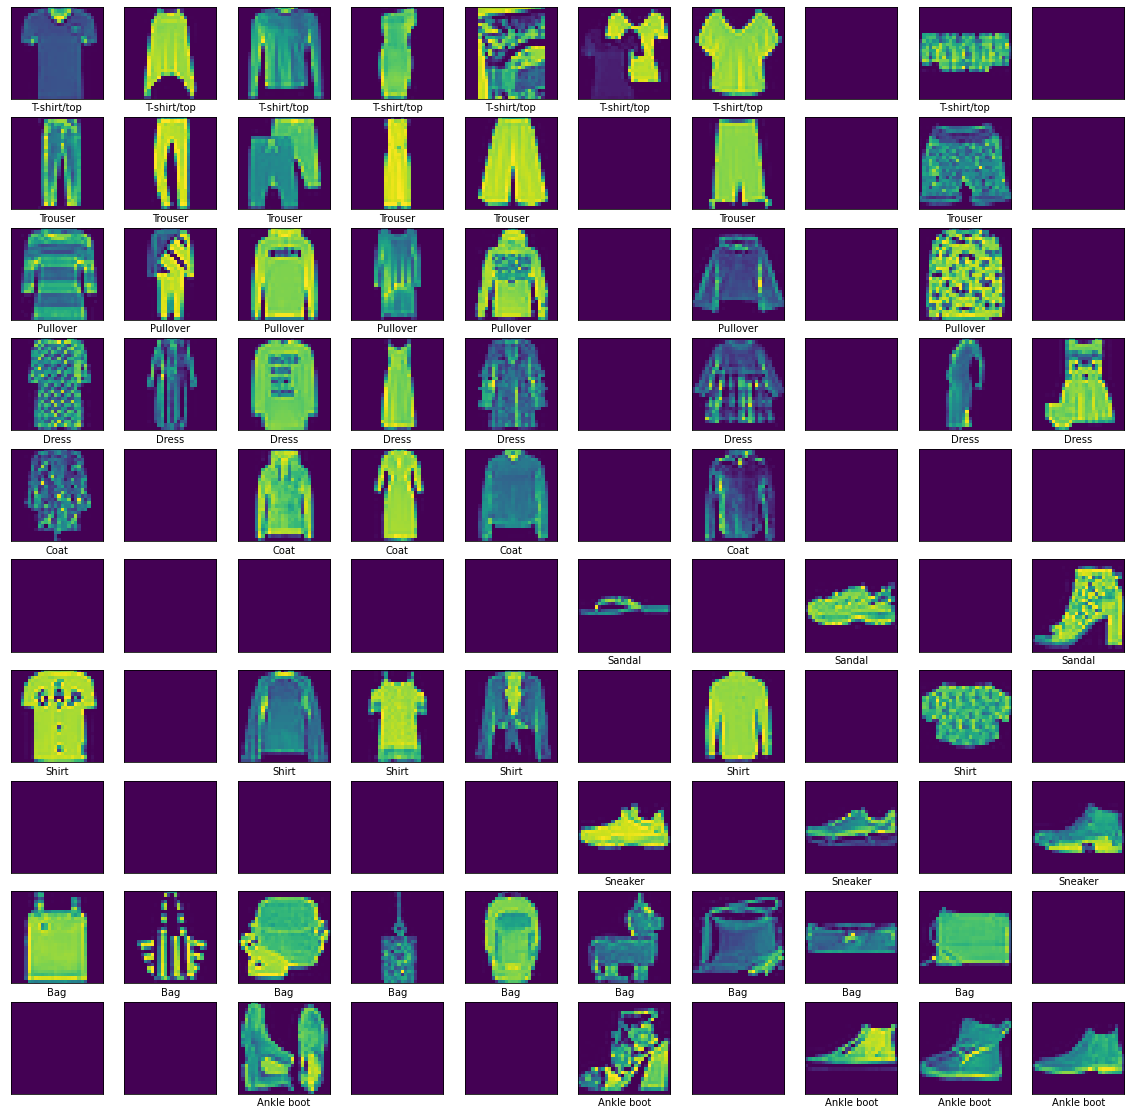

In [10]:
plt.figure(figsize=(20, 20))
for i in range(NUMBER_CLASSES):
    for q in range(NUMBER_CLASSES):
        plt.subplot(10, 10, i * NUMBER_CLASSES + q + 1)
        plt.xticks([])
        plt.yticks([])
        if similarities_matrix[i][q][0] == -1:
            plt.imshow(np.full((28, 28), 255, dtype=int))
            continue
        plt.xlabel(LABELS[i])
        plt.imshow(x_test[int(similarities_matrix[i][q][0])])
plt.show()

In [11]:
print('Total working time: %s seconds.' % (time.time() - start_time))

Total working time: 419.25042605400085 seconds.
